In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
df_twitter= pd.read_csv('twitter_data.csv', header=None, names=[f'col_{i}' for i in range(4)])

In [40]:
print(df_twitter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   2501 non-null   object
 1   col_1   2501 non-null   object
 2   col_2   2501 non-null   object
 3   col_3   2488 non-null   object
dtypes: object(4)
memory usage: 78.3+ KB
None


In [41]:
df_twitter.dropna(subset=['col_3'], inplace=True)

In [42]:
print(df_twitter.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2500
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   2488 non-null   object
 1   col_1   2488 non-null   object
 2   col_2   2488 non-null   object
 3   col_3   2488 non-null   object
dtypes: object(4)
memory usage: 97.2+ KB
None


In [43]:
# Split dataset Twitter
text_twitter = df_twitter['col_3'].values 
label_twitter = df_twitter[['col_2']].values 

text_train_twitter, text_test_twitter, label_train_twitter, label_test_twitter = train_test_split(
    text_twitter, label_twitter, test_size=0.2, random_state=42, shuffle=True
)

In [44]:
model_twitter = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=64),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_twitter.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          960000    
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         98816     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

In [45]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9:
            self.model.stop_training = True
            print("\nThe accuracy of the training set and the validation set has reached > 90%!")

callbacks_twitter = MyCallback()

In [46]:
# Handling NaN values in the text column
text_train_twitter = text_train_twitter.astype(str)
text_test_twitter = text_test_twitter.astype(str)

# Tokenizing, Sequencing, dan Padding
tokenizer_twitter = Tokenizer(num_words=15000, oov_token='<oov>', filters='!"#$%&()*+,-./:;<=>@[\\]^_`{|}~ ')
tokenizer_twitter.fit_on_texts(text_train_twitter)
tokenizer_twitter.fit_on_texts(text_test_twitter)

sequences_train_twitter = tokenizer_twitter.texts_to_sequences(text_train_twitter)
sequences_test_twitter = tokenizer_twitter.texts_to_sequences(text_test_twitter)

padded_train_twitter = pad_sequences(sequences_train_twitter)
padded_test_twitter = pad_sequences(sequences_test_twitter)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()
label_train_twitter_encoded = label_encoder.fit_transform(label_train_twitter)
label_test_twitter_encoded = label_encoder.transform(label_test_twitter)

c:\Users\A S U S\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\A S U S\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [49]:
num_classes = len(label_encoder.classes_)

In [50]:
from tensorflow.keras.utils import to_categorical

In [51]:
label_train_twitter_onehot = to_categorical(label_train_twitter_encoded, num_classes=num_classes)  
label_test_twitter_onehot = to_categorical(label_test_twitter_encoded, num_classes=num_classes)

In [52]:
# Compile model Twitter
model_twitter.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')  # Sesuaikan dengan loss dan jenis label


In [53]:
# Training model
history_twitter = model_twitter.fit(padded_train_twitter, label_train_twitter_onehot, epochs=50,
                                    validation_data=(padded_test_twitter, label_test_twitter_onehot), verbose=2, callbacks=[callbacks_twitter])

Epoch 1/50
63/63 - 27s - loss: 1.3694 - accuracy: 0.4181 - val_loss: 1.3306 - val_accuracy: 0.3996 - 27s/epoch - 426ms/step
Epoch 2/50
63/63 - 17s - loss: 1.3054 - accuracy: 0.4337 - val_loss: 1.2370 - val_accuracy: 0.3996 - 17s/epoch - 266ms/step
Epoch 3/50
63/63 - 18s - loss: 1.0518 - accuracy: 0.4955 - val_loss: 0.8685 - val_accuracy: 0.6084 - 18s/epoch - 283ms/step
Epoch 4/50
63/63 - 15s - loss: 0.6201 - accuracy: 0.7347 - val_loss: 0.6695 - val_accuracy: 0.7329 - 15s/epoch - 233ms/step
Epoch 5/50
63/63 - 17s - loss: 0.4115 - accuracy: 0.8181 - val_loss: 0.3856 - val_accuracy: 0.8173 - 17s/epoch - 277ms/step
Epoch 6/50
63/63 - 12s - loss: 0.2643 - accuracy: 0.8764 - val_loss: 0.2605 - val_accuracy: 0.9116 - 12s/epoch - 183ms/step
Epoch 7/50

The accuracy of the training set and the validation set has reached > 90%!
63/63 - 10s - loss: 0.1558 - accuracy: 0.9422 - val_loss: 0.1739 - val_accuracy: 0.9357 - 10s/epoch - 162ms/step


In [54]:
# Evaluasi model Twitter
model_twitter.evaluate(padded_test_twitter, label_test_twitter_onehot)

16/16 [==============================] - 1s 43ms/step - loss: 0.1739 - accuracy: 0.9357


[0.17394685745239258, 0.935742974281311]

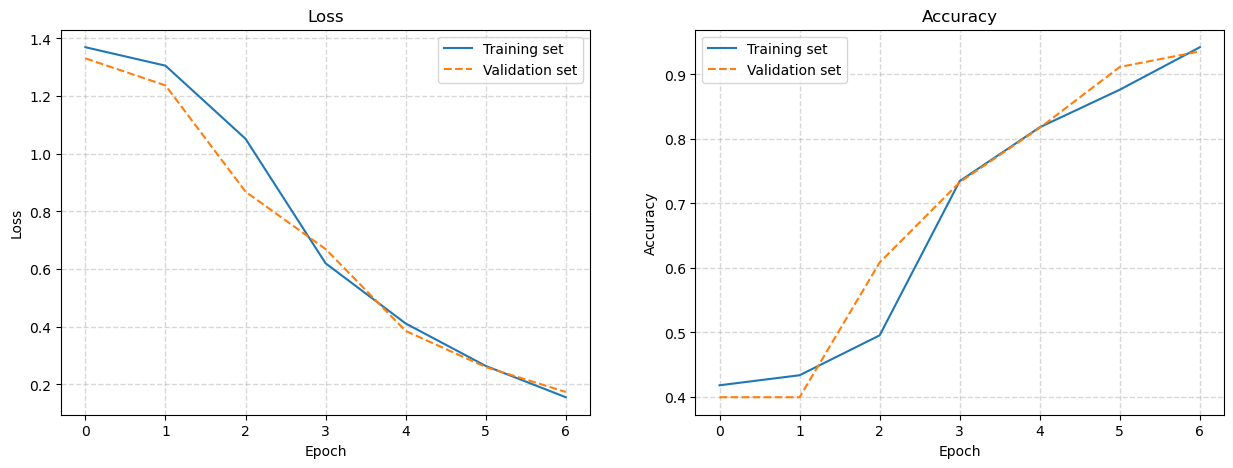

In [55]:
# Visualisasi hasil training model Twitter
loss_twitter = history_twitter.history['loss']
val_loss_twitter = history_twitter.history['val_loss']

acc_twitter = history_twitter.history['accuracy']
val_acc_twitter = history_twitter.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_twitter, label='Training set')
plt.plot(val_loss_twitter, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc_twitter, label='Training set')
plt.plot(val_acc_twitter, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()
